In [3]:
from gsmmutils.model import ModelValidator, MyModel
import gsmmutils
gsmmutils.model.model_validator.DATA_PATH =  "../results"
import seaborn as sns
DATA_PATH = r"../data"
from os.path import join
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(7.08,3)})
plt.rcParams['axes.labelsize'] = 7
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['font.size'] = 7

In [4]:
ng = MyModel(join(DATA_PATH, 'models/model_ng.xml'), 'e_Biomass__cytop')
ng.set_prism_reaction("PRISM_solar_litho__extr")
print(ng.slim_optimize())
ds = MyModel(join(DATA_PATH, 'models/model_ds.xml'), 'e_Biomass__cytop')
ds.set_prism_reaction("PRISM_white_LED__extr")
print(ds.slim_optimize())
pl = MyModel(join(DATA_PATH, 'models/model_pl.xml'), 'e_Biomass__cytop')
pl.set_prism_reaction("PRISM_fluorescent_cool_215W__extr")
print(pl.slim_optimize())

Loading

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-15
Reactions: 4437
Metabolites: 3771
Genes: 1333
Model loaded
0.40715632401484386
Loading

Reactions: 4511
Metabolites: 3676
Genes: 1700
Model loaded
0.20060897294144034
Loading

Reactions: 4697
Metabolites: 4151
Genes: 1349
Model loaded
0.17297415977915206


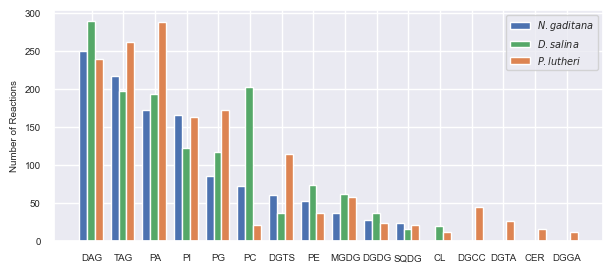

In [7]:
lipids_ng = {k: len(v) for k, v in ng.pathway_reactions_map.items() if k.startswith("BOIMMG")}
lipids_ds = {k: len(v) for k, v in ds.pathway_reactions_map.items() if k.startswith("BOIMMG")}
lipids_pl = {k: len(v) for k, v in pl.pathway_reactions_map.items() if k.startswith("BOIMMG")}
lipids = {k: (lipids_ng.get(k, 0), lipids_ds.get(k, 0), lipids_pl.get(k, 0)) for k in set(lipids_ng.keys()).union(set(lipids_ds.keys())).union(set(lipids_pl.keys()))}
from collections import OrderedDict
ordered_dict = OrderedDict(sorted(lipids.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(7.08, 3))
width = 0.25
x = range(len(ordered_dict))
plt.bar(x, [v[0] for v in ordered_dict.values()], width, label=r"$\it{N. gaditana}$")
plt.bar([i + width for i in x], [v[1] for v in ordered_dict.values()], width, label=r"$\it{D. salina}$", color="#55A868")
plt.bar([i + width * 2 for i in x], [v[2] for v in ordered_dict.values()], width, label=r"$\it{P. lutheri}$")
plt.xticks([i + width / 2 for i in x], ordered_dict.keys(), rotation=90)
plt.legend()
# for i, v in enumerate(ordered_dict.values()):
#     plt.text(i - 0.25, v[0] + 1, str(v[0]))
#     plt.text(i + width - 0.1, v[1] + 1, str(v[1]))
#     plt.text(i + width * 2 - 0.1, v[2] + 1, str(v[2]))
    
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels = [label.replace('BOIMMG (', '') for label in labels]
labels = [label.replace(')', '') for label in labels]
x_ticks_positions = plt.gca().get_xticks()
x_ticks_positions = [e+0.15 for e in x_ticks_positions]
plt.gca().set_xticks(x_ticks_positions, labels, rotation=0)
# plt.xlabel("Lipid Class")
plt.ylabel("Number of Reactions")
plt.savefig("../results/figures/reactions_per_lipid_pathway.pdf", bbox_inches='tight', dpi=1200)

In [5]:
def get_content_by_fa(model, fa, mw):
    e_lipid_reactions = [r for r in model.reactions if r.id.startswith("e") and r.products[0] in model.reactions.e_Lipid__cytop.reactants]
    fa_content_by_lipid = {}
    for reaction in e_lipid_reactions:
        fa_content = 0
        for reactant in reaction.reactants:
            if "di" + fa in reactant.name or "di-(" + fa in reactant.name:
                fa_content += abs(reaction.metabolites[reactant])*2 * (mw-45.01)
            elif fa in reactant.name:
                fa_content += abs(reaction.metabolites[reactant]) * (mw-45.01)
        fa_content_by_lipid[reaction.id] = abs(round(fa_content * abs(model.reactions.e_Lipid__cytop.metabolites[reaction.products[0]]) * model.reactions.e_Biomass__cytop.metabolites[model.metabolites.e_Lipid__cytop]/1000*100, 3))
    return fa_content_by_lipid

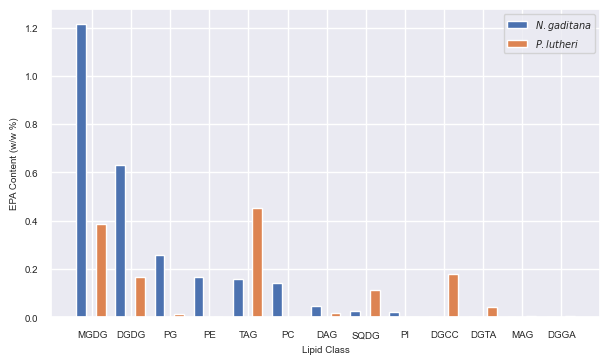

In [33]:
lipids_ng = get_content_by_fa(ng, "eicosapentaenoyl", 302.45)
lipids_ds = get_content_by_fa(ds, "eicosapentaenoyl", 302.45)
lipids_pl = get_content_by_fa(pl, "eicosapentaenoyl", 302.45)
lipids = {k: (lipids_ng.get(k, 0), lipids_ds.get(k, 0), lipids_pl.get(k, 0)) for k in set(lipids_ng.keys()).union(set(lipids_ds.keys())).union(set(lipids_pl.keys()))}
# remove lipids with 0 content
lipids = {k: v for k, v in lipids.items() if sum(v) > 0}
from collections import OrderedDict
ordered_dict = OrderedDict(sorted(lipids.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(7.08, 4))
width = 0.25
x = range(len(ordered_dict))
plt.bar(x, [v[0] for v in ordered_dict.values()], width, label=r"$\it{N. gaditana}$")
# plt.bar([i + width for i in x], [v[1] for v in ordered_dict.values()], width, label=r"$\it{D. salina}$")
plt.bar([i + width * 2 for i in x], [v[2] for v in ordered_dict.values()], width, label=r"$\it{P. lutheri}$")
plt.xticks([i + width / 2 for i in x], ordered_dict.keys(), rotation=90)
plt.legend()
#     
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels = [label.replace('BOIMMG (', '') for label in labels]
labels = [label.replace(')', '') for label in labels]
labels = [label.replace('e_', '') for label in labels]
labels = [label.replace('__er', '') for label in labels]
labels = [label.replace('__chlo', '') for label in labels]
labels = [label.replace('__mito', '') for label in labels]
labels = [label.replace('__cytop', '') for label in labels]
labels = [label.replace('__lip', '') for label in labels]
x_ticks_positions = plt.gca().get_xticks()
x_ticks_positions = [e+0.15 for e in x_ticks_positions]
plt.gca().set_xticks(x_ticks_positions, labels, rotation=0)
plt.xlabel("Lipid Class")
plt.ylabel("EPA Content (w/w %)")
plt.savefig("../results/figures/epa_by_lipid.pdf", bbox_inches='tight', dpi=1200)

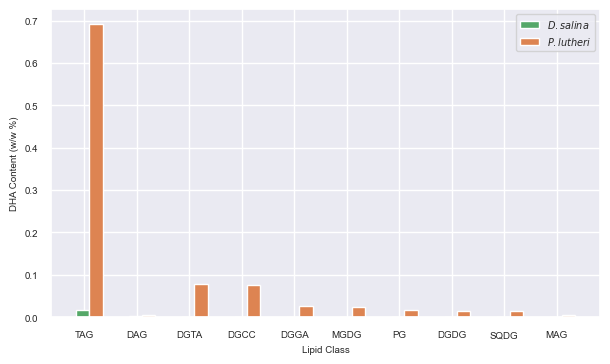

In [34]:
lipids_ng = get_content_by_fa(ng, "docosahexa", 328.49)
lipids_ds = get_content_by_fa(ds, "docosahexa", 328.49)
lipids_pl = get_content_by_fa(pl, "docosahexa", 328.49)
lipids = {k: (lipids_ng.get(k, 0), lipids_ds.get(k, 0), lipids_pl.get(k, 0)) for k in set(lipids_ng.keys()).union(set(lipids_ds.keys())).union(set(lipids_pl.keys()))}
lipids = {k: v for k, v in lipids.items() if sum(v) > 0}
from collections import OrderedDict
ordered_dict = OrderedDict(sorted(lipids.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(7.08, 4))
width = 0.25
x = range(len(ordered_dict))
# plt.bar(x, [v[0] for v in ordered_dict.values()], width, label=r"$\it{N. gaditana}$")
plt.bar([i + width for i in x], [v[1] for v in ordered_dict.values()], width, label=r"$\it{D. salina}$", color='#55A868')
plt.bar([i + width * 2 for i in x], [v[2] for v in ordered_dict.values()], width, label=r"$\it{P. lutheri}$", color="#DD8452")
plt.xticks([i + width / 2 for i in x], ordered_dict.keys(), rotation=90)
plt.legend()
#     
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels = [label.replace('BOIMMG (', '') for label in labels]
labels = [label.replace(')', '') for label in labels]
labels = [label.replace('e_', '') for label in labels]
labels = [label.replace('__er', '') for label in labels]
labels = [label.replace('__chlo', '') for label in labels]
labels = [label.replace('__mito', '') for label in labels]
labels = [label.replace('__cytop', '') for label in labels]
labels = [label.replace('__lip', '') for label in labels]
x_ticks_positions = plt.gca().get_xticks()
x_ticks_positions = [e+0.15 for e in x_ticks_positions]
plt.gca().set_xticks(x_ticks_positions, labels, rotation=0)
plt.xlabel("Lipid Class")
plt.ylabel("DHA Content (w/w %)")
plt.savefig("../results/figures/dha_by_lipid.pdf", bbox_inches='tight', dpi=1200)